```text
# 프로젝트 이름 : 가상화폐 상위 3개 종목(비트코인/이더리움/리플) 전체적인 동향 비교

# 프로젝트 개요 : 비트코인/이더리움/리플 거래액, S&P500 지표 (2018.01.01 ~ 2025.11.31)

# 데이터 출처 : FinanceDataReader(FDR) 라이브러리 사용
 -> 주식·지수 등의 과거/현재 가격 데이터를 수집하는 데이터 조회용 라이브러리)
 - 가상화폐는 Yahoo Finance에서 추출하나, KRW인 경우는 환율에 따라 한국수출입은행 / 네이버 금융 / Yahoo Finance 혼합

# 분석 : 
 - 비트코인/이더리움/리플의 최고가 Top3 날짜
 (시각화 : 라인차트, 바차트)
 - 비트코인/이더리움/리플의 연간 거래량 연간 추세 변화
 - 비트코인/이더리움/리플/S&P500 상관관계 비교
 - 2024년 Top10 변동성 거래량 vs 평균 거래량

# 인사이트
 - 가상화폐들은 특정 발행 회사의 원인을 제외하고 대부분의 경제 상황에 따라 동반 증감하는 형태를 보이며, 특히 2024~2025년은 정책(미국 연준의 금리 정책 등)과 기술(양자 컴퓨터 기술 발전으로 인한 블록체인 보안에 대한 우려, AI 버블 등), 규제 같은 다양한 요인들에 의해 변동성이 많이 확대된 것으로 보여진다.
 - S&P500 지수와 가상화폐 거래액이 양의 상관관계를 나타내는 것을 보아 S&P500 지수가 상승할 때 가상화폐 시장도 강세를 보이며, 반대로 경기 침체 우려가 커질 때 S&P500와 가상화폐 시장이 동시 침체될 수 있음을 볼 수 있다.

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import FinanceDataReader as fdr
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
btc = fdr.DataReader('BTC/KRW', '2018-01-01', '2025-12-01').round(0).astype('Int64')    # 비트코인
eth = fdr.DataReader('ETH/KRW', '2018-01-01', '2025-12-01').round(0).astype('Int64')    # 이더리움
xrp = fdr.DataReader('XRP/KRW', '2018-01-01', '2025-12-01').round(0).astype('Int64')    # 리플
inx = fdr.DataReader('IXIC','2018-01-01','2025-12-01').round(0).astype('Int64').drop(columns=['Adj Close']) #sp500


In [4]:
# btc['Close'].diff()
btc.nlargest(3, 'Close', keep='all')

,Open,High,Low,Close,Volume,Adj Close
2025-10-06,173786256,177973280,173877888,176015280,102388562116129,176015280
2025-10-08,171918576,176854880,172219216,175598128,93033160659960,175598128
2025-10-05,172314256,176733376,171993728,173790512,103685080331879,173790512


In [5]:
eth.nlargest(3, 'Close', keep='all')

,Open,High,Low,Close,Volume,Adj Close
2025-08-22,5915800,6759982,5853051,6687553,105151474908541,6687553
2025-08-24,6611915,6856957,6525774,6614206,72519472321955,6614206
2025-10-06,6353286,6678670,6341200,6614050,63480555835572,6614050


In [6]:
xrp.nlargest(3, 'Close', keep='all')

,Open,High,Low,Close,Volume,Adj Close
2025-07-21,4814,5039,4751,4917,13157491453881,4917
2025-07-22,4917,4940,4761,4904,12326625375000,4904
2025-07-17,4215,4931,4186,4867,26609397033012,4867


In [7]:
btc.diff().nlargest(3, 'Close', keep='all')

,Open,High,Low,Close,Volume,Adj Close
2025-03-02,2430072,12456624,1821792,12013496,42697385202886,12013496
2024-11-11,5183344,11557672,5330840,11784952,49870260170812,11784952
2024-11-06,2525464,9651792,2505744,10275488,102631418784909,10275488


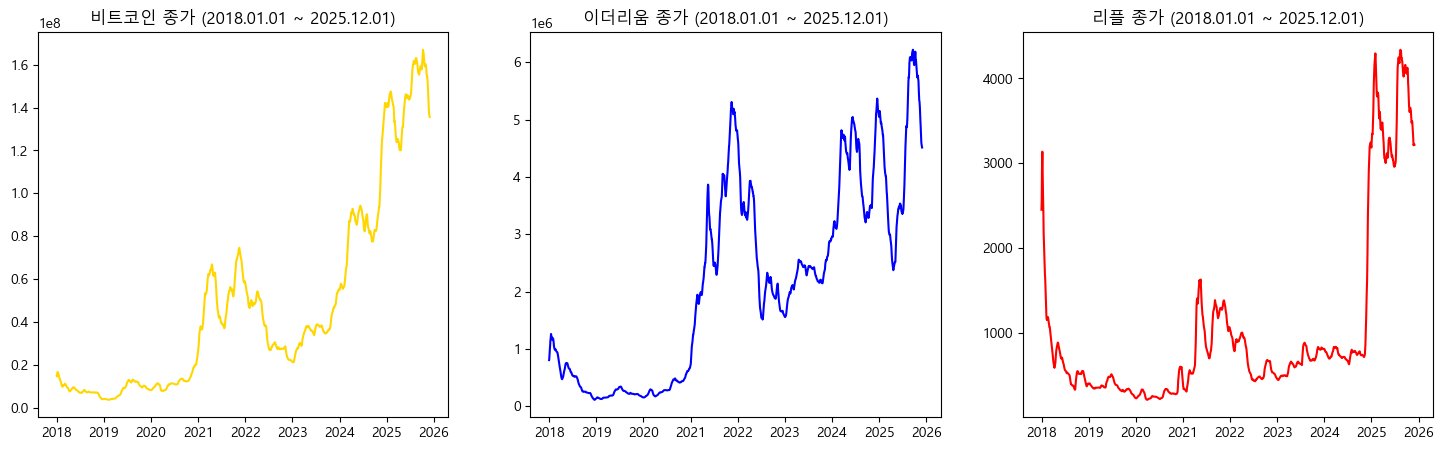

In [8]:
x = btc.index
y1 = btc['Close'].ewm(span=20).mean()
y2 = eth['Close'].ewm(span=20).mean()
y3 = xrp['Close'].ewm(span=20).mean()

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(x, y1, '#FFD700')
ax2.plot(x, y2, 'b')
ax3.plot(x, y3, 'r')
ax1.set_title('비트코인 종가 (2018.01.01 ~ 2025.12.01)')
ax2.set_title('이더리움 종가 (2018.01.01 ~ 2025.12.01)')
ax3.set_title('리플 종가 (2018.01.01 ~ 2025.12.01)')

plt.show()

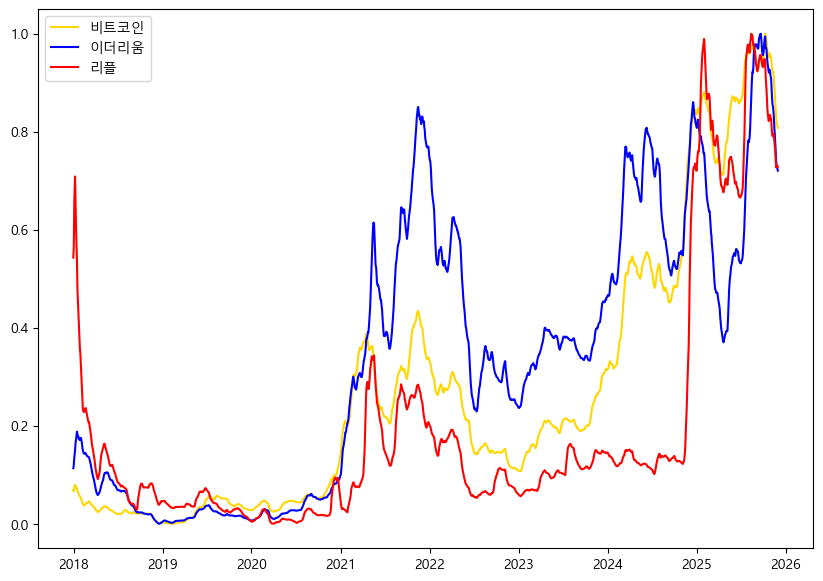

In [9]:
mbtc = btc['Close'].ewm(span=20).mean()
meth = eth['Close'].ewm(span=20).mean()
mxrp = xrp['Close'].ewm(span=20).mean()

nbtc = (mbtc - mbtc.min()) / (mbtc.max() - mbtc.min())
neth = (meth - meth.min()) / (meth.max() - meth.min())
nxrp = (mxrp - mxrp.min()) / (mxrp.max() - mxrp.min())

fig = plt.figure(figsize=(10,7))
# plt.plot(nbtc)
# plt.plot(neth)
# plt.plot(nxrp)
plt.plot(nbtc, '#FFD700', neth, 'b', nxrp, 'r')
plt.legend(['비트코인','이더리움','리플'])

plt.show()

NameError: name 'inx' is not defined

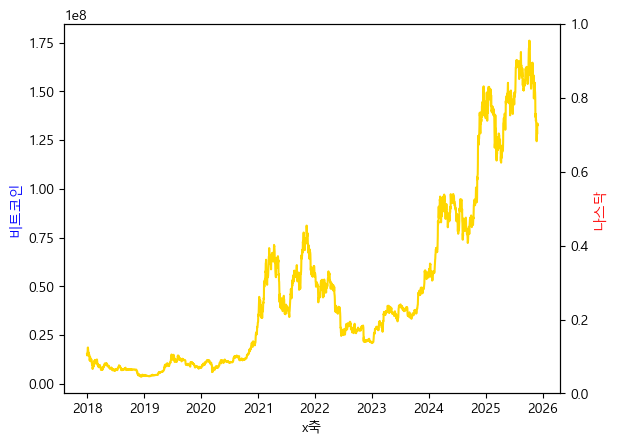

In [10]:
fig, axes = plt.subplots()
axes.set_xlabel( 'x축')
axes.set_ylabel( '비트코인',color='b')
plt.plot(btc.index, btc['Close'],color='#ffd700')
axes.plot()

ax2 = axes.twinx()
ax2.set_ylabel( '나스닥',color='r')
plt.plot(inx.index, inx['Close'],'r--')
plt.show()

In [25]:
btcc = btc[['Close']].rename(columns={'Close':'비트코인'})
ethc = eth[['Close']].rename(columns={'Close':'이더리움'})
xrpc = xrp[['Close']].rename(columns={'Close':'리플'})
inxc = inx[['Close']].rename(columns={'Close':'SP500'})
result = pd.concat([inxc,btcc,ethc,xrpc], axis=1)
result

,SP500,비트코인,이더리움,리플
2017-12-31,<NA>,15094262,806866,2453
2018-01-01,<NA>,14548333,823056,2547
2018-01-02,7007,15918331,939713,2636
2018-01-03,7066,16172952,1024276,3304
2018-01-04,7078,16552935,1040896,3392
...,...,...,...,...
2025-11-26,23215,133208456,4455782,3273
2025-11-27,<NA>,133495440,4408457,3218
2025-11-28,23366,133435848,4450301,3200
2025-11-29,<NA>,133336760,4390687,3234


          SP500      비트코인      이더리움        리플
SP500  1.000000  0.938988  0.900775  0.730633
비트코인   0.938988  1.000000  0.856516  0.868625
이더리움   0.900775  0.856516  1.000000  0.651290
리플     0.730633  0.868625  0.651290  1.000000


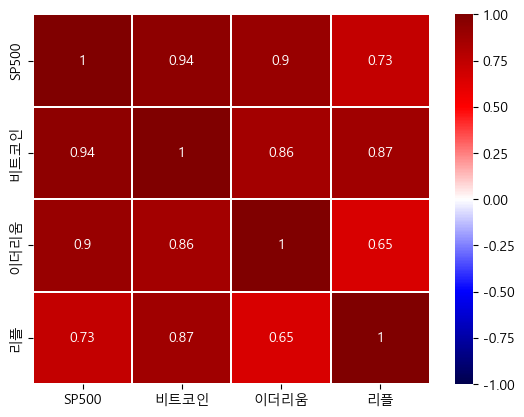

In [26]:
print(result.corr())
sb.heatmap(result.corr(),vmin=-1,vmax=1,annot=True,cmap='seismic',linewidths=0.2)
plt.show()

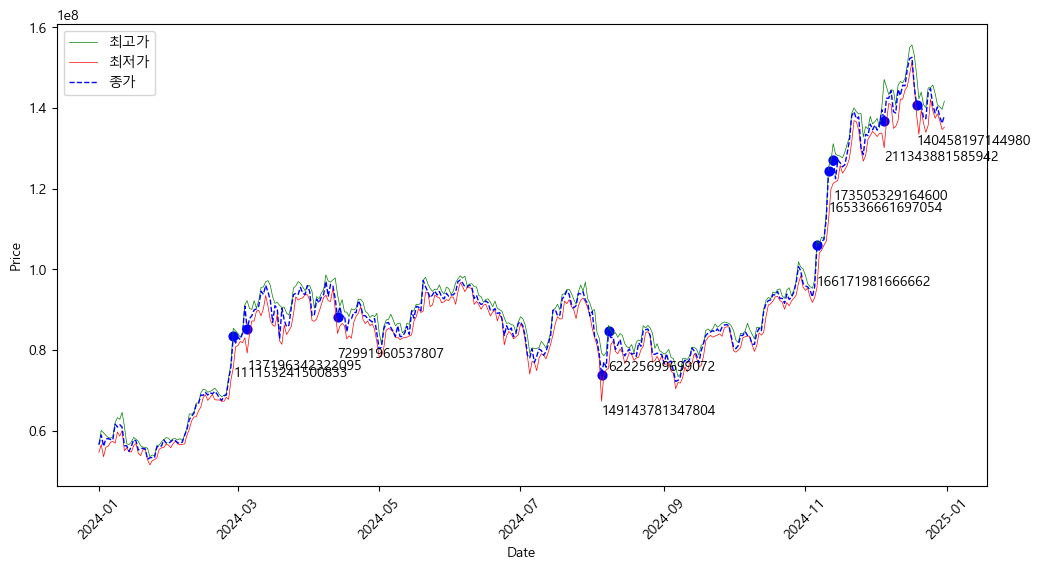

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
btc20=btc.loc['2024']
btc_diff=btc20['High']-btc20['Low']
btc_diff_top=btc_diff.nlargest(10)
hldata={}


ax.plot(btc20.index, btc20['High'], label='최고가', color='green', linewidth=0.5)
ax.plot(btc20.index, btc20['Low'], label='최저가', color='red', linewidth=0.5)
ax.plot(btc20.index, btc20['Close'], label='종가', color='blue', linewidth=1,linestyle='--')
#btc_diff_top.index.astype(str).str[:10]
for a,b,c in zip(btc_diff_top.index,btc20.loc[btc_diff_top.index]['Close'],btc20.loc[btc_diff_top.index]['Volume']):
    plt.scatter(a,b,color='blue',s=40)
    plt.text(a,b-10000000,c)
    hldata[a]=b

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

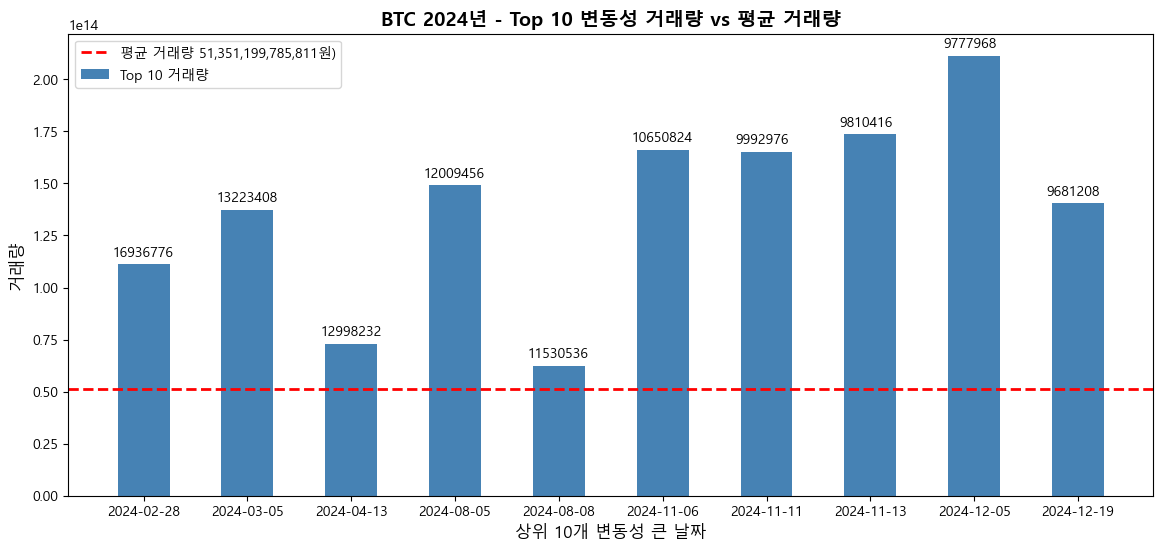

In [24]:
top10=btc20.loc[btc_diff_top.index]['Volume']
top10=top10.sort_index(ascending=True)
btc_all=btc20['Volume'].mean()


fig, ax = plt.subplots(figsize=(14, 6))
list=[i for i in range(len(top10))]

ax.bar(list, top10.values, width=0.5, label='Top 10 거래량', color='steelblue')
ax.axhline(y=btc_all, color='red', linestyle='--', linewidth=2, label=f'평균 거래량 {btc_all:,.0f}원)')

ax.set_xlabel('상위 10개 변동성 큰 날짜', fontsize=12)
ax.set_ylabel('거래량', fontsize=12)
ax.set_title('BTC 2024년 - Top 10 변동성 거래량 vs 평균 거래량', fontsize=14, fontweight='bold')

for a,b,c in zip(list,top10.values,btc_diff_top.values):
    plt.text(a-0.3,b+4000000000000,c)
    hldata[a]=b


ax.legend()
plt.xticks(list,top10.index.astype(str).str[:10])
plt.show()